### Q1) A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [19]:
#Load the dataset
data = pd.read_csv('Cutlets.csv')
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


#### Assume,
- Null hyposthesis as Ho: μ1 = μ2 (There is no difference in diameters of cutlets between two units) 
- Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units) 
- Hence 2 Sample 2 Tail test applicable

In [22]:
#location based selection-unit A
unitA=pd.Series(data.iloc[:,0])
unitA.head()

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [23]:
#location based selection-unit B
unitB=pd.Series(data.iloc[:,1])
unitB.head()

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

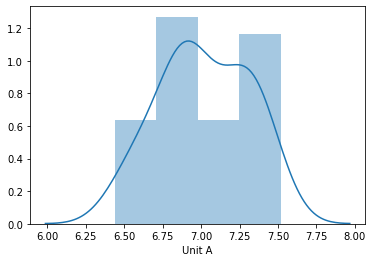

In [31]:
## to check if Unit A is approximately follows a Normal distribution.
sns.distplot(unitA)
plt.show();

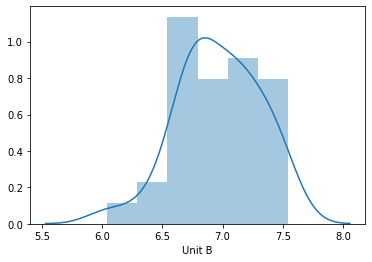

In [32]:
## to check if Unit B is approximately follows a Normal distribution.
sns.distplot(unitB)
plt.show();

In [33]:
# 2-sample 2-tail ttest:   stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.ttest_ind(unitA,unitB)
p_value

Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)

In [37]:
# 2-tail probability
p_value[1]     

0.4722394724599501

In [ ]:
# compare p_value with α = 0.05 (At 5% significance level)

### Inference: 
- As (p_value=0.4722) > (α = 0.05); Accept Null Hypothesis i.e. μ1 = μ2 ( Thus, there is no difference in diameters of cutlets between two units)

### Q2) A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [38]:
#Load the dataset
data = pd.read_csv('LabTAT.csv')
data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60



- Anova ftest statistics: Analysis of varaince between more than 2 samples or columns 
- Assume Null Hypothesis Ho as No Varaince: All samples TAT population means are same 
- Thus Alternate Hypothesis Ha as has Variance: Atleast one sample TAT population mean is different

In [39]:
# Anova ftest statistics: stats.f_oneway(column-1,column-2,column-3,column-4)
p_value=stats.f_oneway(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])
p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [40]:
# compare it with α = 0.05
p_value[1]  

2.1156708949992414e-57

#### Inference: 
- As (p_value=0) < (α = 0.05); Reject Null Hypothesis 
- i.e. Atleast one sample TAT population mean is different Thus there is variance or difference in average Turn Around Time (TAT) of reports of the laboratories on their preferred list.

 Q3) 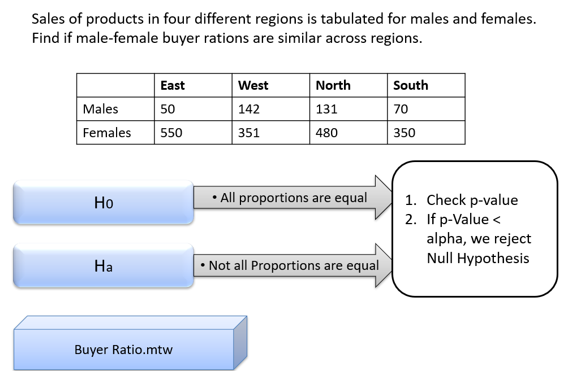

In [41]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

- Assume Null Hypothesis as Ho: Independence of categorical variables (male-female buyer rations are similar across regions (does not vary and are not related) 
- Alternate Hypothesis as Ha: Dependence of categorical variables (male-female buyer rations are NOT similar across regions (does vary and somewhat/significantly related)

In [42]:
# load the dataset
data=pd.read_csv('BuyerRatio.csv')
data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [43]:
# Make dimensional array
obs=np.array([[50,142,131,70],[435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [44]:
# Chi2 contengency independence test
chi2_contingency(obs) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [45]:
# Compare p_value with α = 0.05

#### Inference: 
- As (p-value = 0.6603) > (α = 0.05); Accept the Null Hypothesis i.e. Independence of categorical variables. Thus, male-female buyer rations are similar across regions and are not related

#### Q4) TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [47]:
# load the dataset
data=pd.read_csv('Costomer+OrderForm.csv')
data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [48]:
data.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [49]:
data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [50]:
data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [51]:
data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [53]:
# Create a contingency table
obs1=np.array([[271,267,269,280],[29,33,31,20]])
obs1

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

- Assume Null Hypothesis as Ho: Independence of categorical variables (customer order forms defective % does not varies by centre) 
- Alternative hypothesis as Ha Dependence of categorical variables (customer order forms defective % varies by centre)

In [54]:
# Chi2 contengency independence test
chi2_contingency(obs1) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [ ]:
# Compare p_value with α = 0.05

#### Inference: 
- As (p_value = 0.2771) > (α = 0.05); Accept Null Hypthesis i.e. Independence of categorical variables. Thus, customer order forms defective % does not varies by centre